Accuracy: 98.05%

Confusion Matrix:
[[368   0]
 [  8  35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       368
           1       1.00      0.81      0.90        43

    accuracy                           0.98       411
   macro avg       0.99      0.91      0.94       411
weighted avg       0.98      0.98      0.98       411



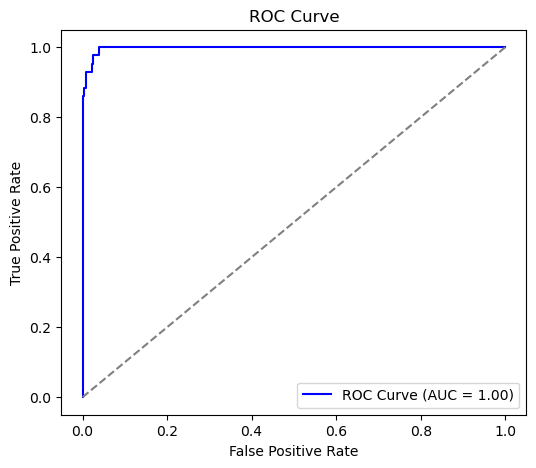

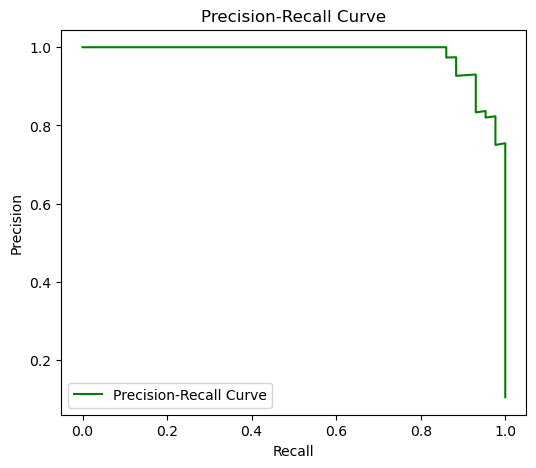

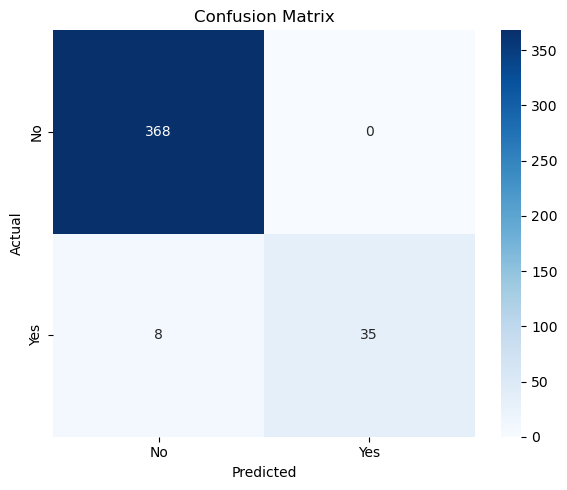

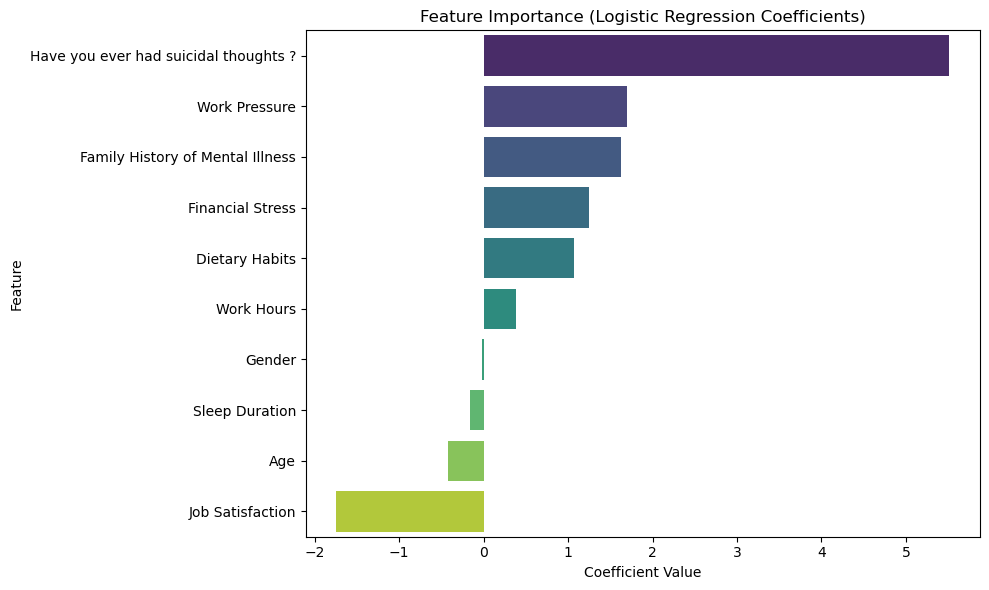

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel(r"C:\Users\mompa\Documents\Cleaned Depression Professional Dataset.xlsx", sheet_name="Cleaned Depression Professional")

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le

# Split into features and target
X = df_encoded.drop("Depression", axis=1)
y = df_encoded["Depression"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

# Plot confusion matrix
def plot_conf_matrix(conf_matrix, labels):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Plot feature importance
def plot_feature_importance(model, feature_names):
    importance = pd.Series(model.coef_[0], index=feature_names).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance.values, y=importance.index, hue=importance.index, palette="viridis", legend=False)
    plt.title("Feature Importance (Logistic Regression Coefficients)")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Get probability scores
y_probs = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Display plots
plot_conf_matrix(conf_matrix, labels=label_encoders['Depression'].classes_)
plot_feature_importance(model, X.columns)
